In [12]:
import csv
import base64
from PIL import Image
from io import BytesIO
import matplotlib.pyplot as plt

In [39]:
path = "/home/zxy/LMUData/"
datasets_name = "MME.tsv"

with open(path + datasets_name, "r", encoding="utf-8") as tsvfile:
    # 创建一个csv.reader对象，指定制表符为字段分隔符
    tsvreader = csv.reader(tsvfile, delimiter="\t")

    # 读取第一行（标题行）
    headers = next(tsvreader)
    print("Headers:", headers)

Headers: ['index', 'category', 'image_path', 'question', 'answer', 'image']


Question-0, 
category: OCR 
question: Is the word in the logo "angie's"? Please answer yes or no. 
answer: Yes


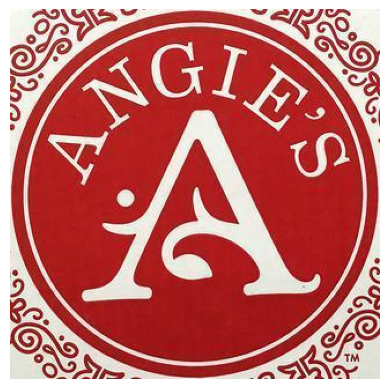

Question-1, 
category: OCR 
question: Is the word in the logo "angle's"? Please answer yes or no. 
answer: No


Error: Invalid base64-encoded string: number of data characters (1) cannot be 1 more than a multiple of 4

In [42]:
# 打开TSV文件
with open(path + datasets_name, "r", encoding="utf-8") as tsvfile:
    # 创建一个csv.reader对象，指定制表符为字段分隔符
    tsvreader = csv.reader(tsvfile, delimiter="\t")
    headers = next(tsvreader)

    row_counter = 0
    # 遍历文件中的每一行
    for row in tsvreader:
        # get the index of the columns
        question_index = headers.index("question")
        category_index = headers.index("category")
        answer_index = headers.index("answer")
        image_index = headers.index("image")
        print(
            "Question-{}, \ncategory: {} \nquestion: {} \nanswer: {}".format(
                row_counter,
                row[category_index],
                row[question_index],
                row[answer_index],
            )
        )

        # image decode & show
        encoded_image = row[image_index]
        image_data = base64.b64decode(encoded_image)
        image_file = BytesIO(image_data)
        image = Image.open(image_file)
        # 使用matplotlib显示图像
        plt.imshow(image)
        plt.axis("off")  # 不显示坐标轴
        plt.show()

        # for loop
        row_counter += 1
        if row_counter >= 10:
            break

In [30]:
import csv
# Increase the field size limit
csv.field_size_limit(10000000)


with open(path + datasets_name, "r", encoding="utf-8") as tsvfile:
    # 创建一个csv.reader对象，指定制表符为字段分隔符
    tsvreader = csv.reader(tsvfile, delimiter="\t")
    row_counter = 0
    categories_set = set()
    category_count = {}
    for row in tsvreader:
        # get the index of the columns
        category_index = headers.index("category")
        # question_index = headers.index("question")
        # answer_index = headers.index("answer")
        # image_index = headers.index("image")
        # print(
        #     "category: {} \n".format(
        #         # row_counter,
        #         row[category_index],
        #         # row[question_index],
        #         # row[answer_index],
        #     )
        # )
        category = row[category_index]
        categories_set.add(category)
        if category in category_count:
            category_count[category] += 1
        else:
            category_count[category] = 1
        

    print("Total categories: ", len(categories_set))
    print(category_count)

Total categories:  15
{'category': 1, 'OCR': 40, 'artwork': 400, 'celebrity': 340, 'code_reasoning': 40, 'color': 60, 'commonsense_reasoning': 140, 'count': 60, 'existence': 60, 'landmark': 400, 'numerical_calculation': 40, 'position': 60, 'posters': 294, 'scene': 400, 'text_translation': 40}


In [38]:
from openai import OpenAI
client = OpenAI(
    api_key='456',
    base_url="http://0.0.0.0:23333/v1"
)
model_name = client.models.list().data[0].id
response = client.chat.completions.create(
  model=model_name,
  messages=[
    {"role": "system", "content": "You are a helpful assistant."},
    {"role": "user", "content": " provide three suggestions about time management"},
  ],
    temperature=0.8,
    top_p=0.8
)
print(response)

ChatCompletion(id='7', choices=[Choice(finish_reason='stop', index=0, message=ChatCompletionMessage(content="Sure, here are three suggestions for effective time management:\n\n1. **Prioritize Tasks:** Identify the most important tasks that need to be completed and prioritize them. This way, you can focus on tackling the most critical issues first and avoid wasting time on less crucial tasks.\n\n2. **Set Realistic Goals:** Break down larger tasks into smaller, manageable goals. This will make it easier to track progress and stay motivated. Remember, setting ambitious goals can be helpful, but setting unrealistic expectations can lead to frustration and a lack of progress.\n\n3. **Use Time-Blocking:** Schedule your day by blocking out specific times for different tasks. This method helps you stay focused and prevents distractions. It also allows you to allocate more time for important tasks and less time for less important ones. Remember to adjust your schedule based on your energy level